<a href="https://colab.research.google.com/github/Akbar-fitriawan/tutorial-machine-learning/blob/main/Neural_Network_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt



# Generate data

### Data otong

In [101]:
# Tinggi badan
x1 = np.array([18 + 1*np.random.randn() for i in range(1,100)])
# Berat badan
x2 = np.array([5 + 1*np.random.randn() for i in range(1,100)])
# status otong
y1 = np.array([1 for i in range(1,100)])
# status ucup
y2 = np.array([0 for i in range(1,100)])

# label
label = ["otong" for i in range(1,100)]

# data compilasi
data_otong = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    'label':label,
}

# data frame
data_frame_1 = pd.DataFrame(data=data_otong)

In [102]:
print(data_frame_1)

           x1        x2  y1  y2  label
0   17.191187  5.464795   1   0  otong
1   19.521436  5.966164   1   0  otong
2   17.414459  4.560344   1   0  otong
3   17.709961  5.033290   1   0  otong
4   18.828073  3.384387   1   0  otong
..        ...       ...  ..  ..    ...
94  19.458123  4.226913   1   0  otong
95  18.003994  6.310184   1   0  otong
96  18.223802  5.004231   1   0  otong
97  18.694709  4.782532   1   0  otong
98  19.623010  4.181536   1   0  otong

[99 rows x 5 columns]


### Data ucup

In [103]:
# Tinggi badan
x1 = np.array([10 + 1*np.random.randn() for i in range(1,100)])
# Berat badan
x2 = np.array([8 + 1*np.random.randn() for i in range(1,100)])
# status otong
y1 = np.array([0 for i in range(1,100)])
# status ucup
y2 = np.array([1 for i in range(1,100)])

# label
label = ["ucup" for i in range(1,100)]

# data compilasi
data_ucup = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    'label':label,
}

# data frame
data_frame_2 = pd.DataFrame(data=data_ucup)

In [104]:
print(data_frame_2)

           x1        x2  y1  y2 label
0   11.190376  8.794142   0   1  ucup
1   10.637209  7.496479   0   1  ucup
2   11.055909  8.202014   0   1  ucup
3   10.838192  9.937283   0   1  ucup
4    8.937638  7.687451   0   1  ucup
..        ...       ...  ..  ..   ...
94   9.741291  6.838116   0   1  ucup
95  10.620312  6.782745   0   1  ucup
96  11.805929  7.862217   0   1  ucup
97  11.317867  8.077516   0   1  ucup
98  10.440501  8.231423   0   1  ucup

[99 rows x 5 columns]


### Gabungkan data

In [105]:
data_frame = pd.concat([data_frame_1,data_frame_2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True,drop=True)
print(data_frame)

            x1        x2  y1  y2  label
0    18.725540  4.219336   1   0  otong
1    17.385327  7.536154   1   0  otong
2    18.824352  4.943165   1   0  otong
3    11.054796  6.316968   0   1   ucup
4    16.509588  6.151097   1   0  otong
..         ...       ...  ..  ..    ...
193   8.720449  7.553195   0   1   ucup
194  10.626369  6.942848   0   1   ucup
195  10.819699  8.616931   0   1   ucup
196  18.906633  4.205659   1   0  otong
197  10.377556  9.356544   0   1   ucup

[198 rows x 5 columns]


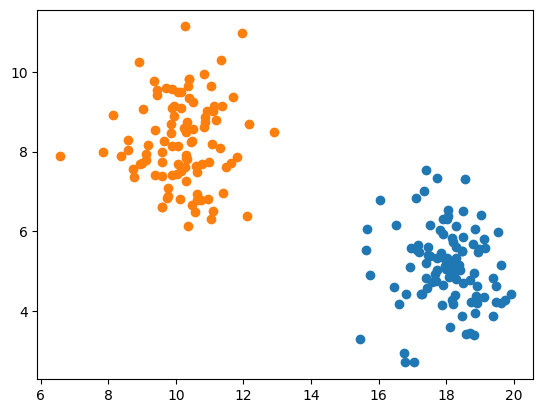

In [106]:
plt.scatter(data_frame_1.x1,data_frame_1.x2)
plt.scatter(data_frame_2.x1,data_frame_2.x2)
plt.show()

## Neural Networknya

In [107]:
# fungsi sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))

### 1. Matrix Wight




In [108]:
w11 = np.random.uniform(-0.01,0.01)
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

W = np.array([[w11,w12],[w21,w22]])

print(W)

[[0.00497811 0.00514776]
 [0.00299797 0.00858906]]


### 2. Iterasi Neural Network

In [109]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index,baris in data_frame.iterrows():
	W_lama = W
	input = np.array([[baris.x1],[baris.x2]])
	output_hidden = np.dot(W_lama,input)
	output_learn = sigmoid(output_hidden)
	output_actual = np.array([[baris.y1],[baris.y2]])

	error = output_actual - output_learn

	delta_W = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)

	W_baru = W_lama + delta_W
	W = W_baru

	error_array[:,index] = error.T*error.T

	tebakan = np.argmax(output_learn)
	jawaban = np.argmax(output_actual)

	label_tebakan = "ucup" if tebakan == 1 else "otong"

	print(f"index = {index}, tebakan = {label_tebakan}, jawaban = {baris.label}")

	if tebakan == jawaban:
		answer.append(1)
	else:
		answer.append(0)



index = 0, tebakan = otong, jawaban = otong
index = 1, tebakan = otong, jawaban = otong
index = 2, tebakan = otong, jawaban = otong
index = 3, tebakan = otong, jawaban = ucup
index = 4, tebakan = otong, jawaban = otong
index = 5, tebakan = otong, jawaban = ucup
index = 6, tebakan = otong, jawaban = ucup
index = 7, tebakan = ucup, jawaban = ucup
index = 8, tebakan = ucup, jawaban = otong
index = 9, tebakan = otong, jawaban = otong
index = 10, tebakan = otong, jawaban = ucup
index = 11, tebakan = ucup, jawaban = ucup
index = 12, tebakan = ucup, jawaban = otong
index = 13, tebakan = otong, jawaban = ucup
index = 14, tebakan = otong, jawaban = otong
index = 15, tebakan = ucup, jawaban = ucup
index = 16, tebakan = ucup, jawaban = ucup
index = 17, tebakan = ucup, jawaban = ucup
index = 18, tebakan = ucup, jawaban = ucup
index = 19, tebakan = ucup, jawaban = otong
index = 20, tebakan = otong, jawaban = otong
index = 21, tebakan = otong, jawaban = otong
index = 22, tebakan = otong, jawaban = o

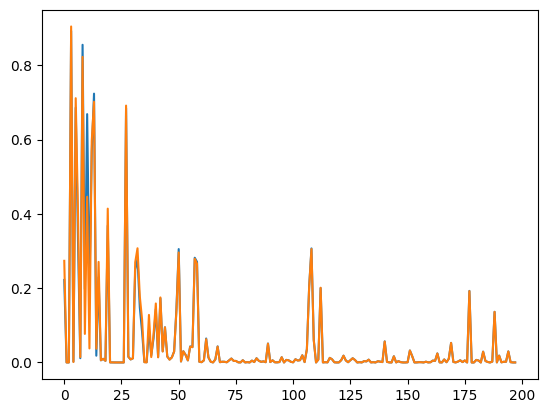

In [110]:
plt.plot(error_array.T)

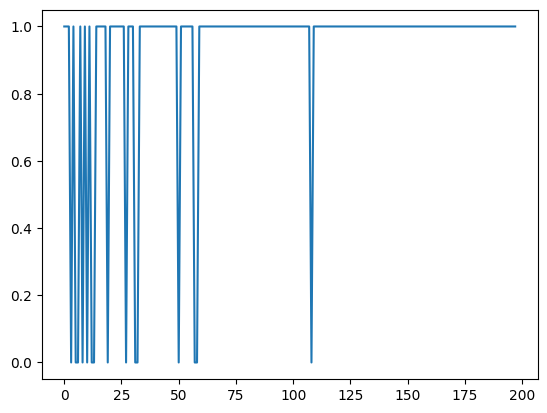

In [111]:
plt.plot(answer)

In [112]:
x1 = 19
x2 = 3

input = np.array([[x1],[x2]])
output_hidden = np.dot(W,input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "ucup" if prediction == 1 else "otong"

print(f"tinggi = {x1*10}, berat = {x2*10}, adalah {label_prediction}")

tinggi = 190, berat = 30, adalah otong
